In [79]:
#First we import all the necessary libraries and suppress warnings. Then let's read the day Excel into
# a dataframe and look at the first 5 rows to get a feel of what the overall dataset looks like
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
bk = pd.DataFrame(pd.read_csv(r"C:\Users\vinay\OneDrive\Documents\Upgrad\Downloads\day.csv"))
print(bk.head())

# Information on the nulls and datatype of the columns in the dataframe
bk.info()

# Check the number of rows and columns in the dataframe
print(bk.shape)

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

We can see right away from the Non-Null count column that there are no null values present for any of the 16 columns in the dataframe

In [80]:
bk2 = bk.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bk2.drop_duplicates(subset=None, inplace=True)
print(bk2.shape)
print(bk.shape)

(730, 16)
(730, 16)


Now we will remove the unusable columns from the dataframe. Upon analysing the dictionary, we find that these columns can be removed:
1) dteday: The dataframe already contains month and year, which are more granular. 
2) instant: This is just a unique identifier for each row and will not be on any use in the analysis
3) casual: this shows whether the user is registered or not. Doesn't matter since we only care about the totals.
4) registered: opposite of casual, same thing. We only care about the totals.

In [81]:
bk3=bk[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

Since some of the columns have a definite order to them, it makes sense to quantify them. The following columns are found to be ordered:

In [82]:
# Convert to 'category' data type

bk3['weekday']=bk3['weekday'].astype('category')
bk3['weathersit']=bk3['weathersit'].astype('category')
bk3['season']=bk3['season'].astype('category')
bk3['mnth']=bk3['mnth'].astype('category')
bk3 = pd.get_dummies(bk3, drop_first=True)
bk3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

Splitting the data:
We will go with a 70:30 split for the training:test dataset

In [83]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bk_train, bk_test = train_test_split(bk3, train_size = 0.70, test_size = 0.30, random_state = 333)
print(bk_train.shape)
print(bk_test.shape)

(510, 30)
(219, 30)


The Training dataset now has 510 rows and the Testing dataset has 219

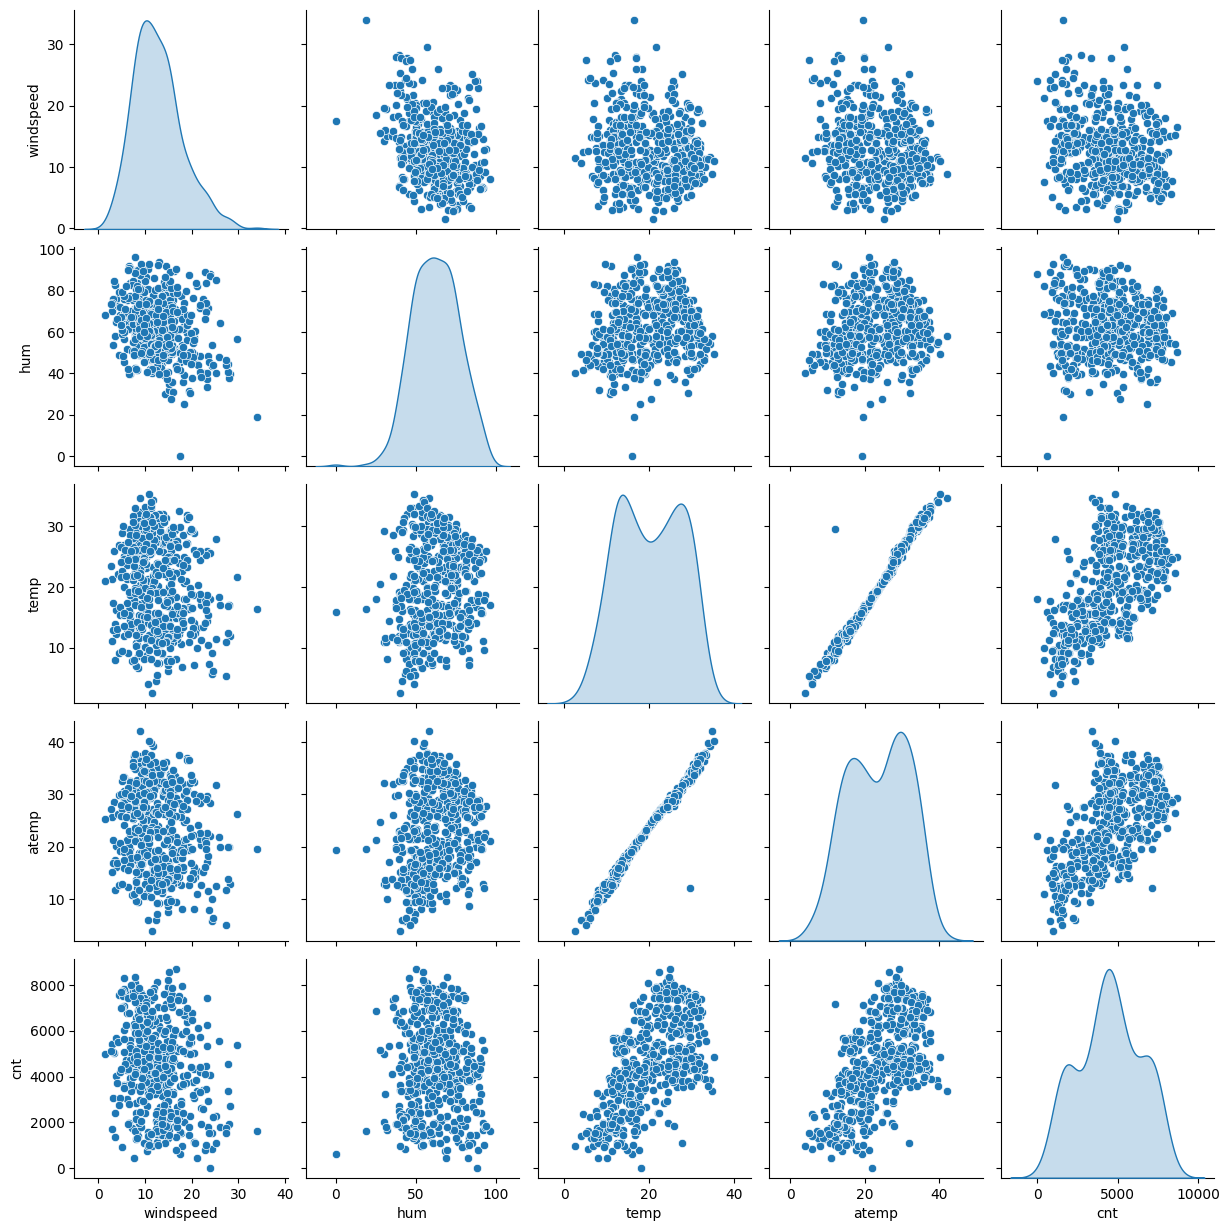

In [84]:
# Create a new dataframe of only numeric variables and visualize the correlation between each
# using pairplots

bk_num=bk_train[[ 'windspeed', 'hum','temp', 'atemp',  'cnt']]

sns.pairplot(bk_num, diag_kind='kde')
plt.show()

From the above scatterplots we see there is a clear correlation between atemp and cnt, and temp and cnt

Now we will create boxplots for the categorical variables and see how each of them influences the count

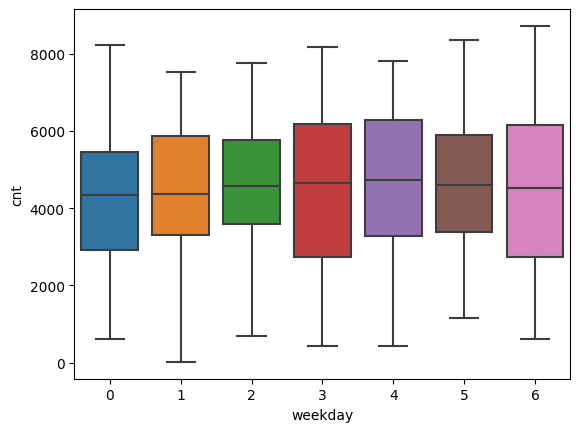

In [85]:

sns.boxplot(x = 'weekday', y = 'cnt', data = bk)
plt.show()

For "weekday" we see no obvious deviation in the median across the different values.

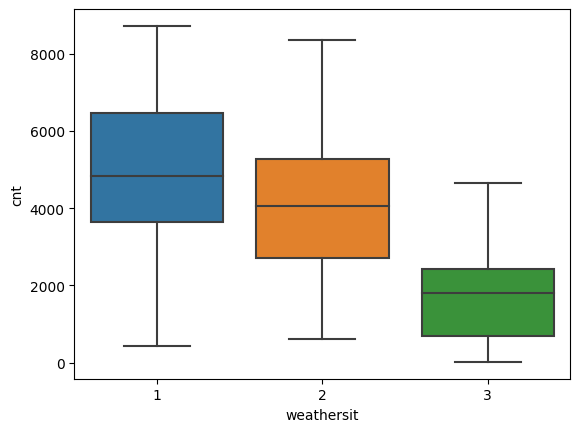

In [86]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bk)
plt.show()

It is clear form the boxplot above that the median in weathersit 1 > 2 > 3. There seems to be a good indication that weathersit is a good predictor for bookings.

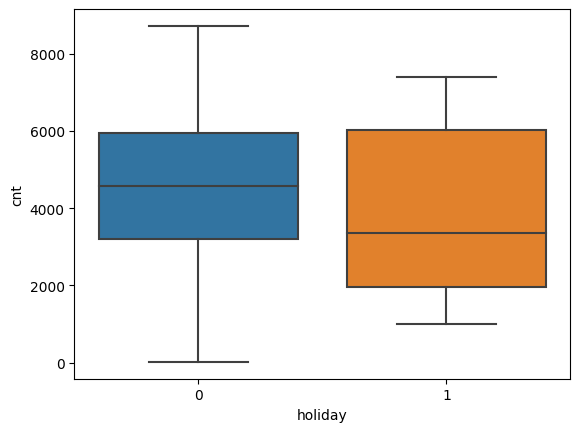

In [87]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bk)
plt.show()

For holiday, although the range for value 1 is greater than the range for value 0, the median for value 1 is lower than that for value 2. Therefore we cannot safely assume that holiday would be a good predictor.

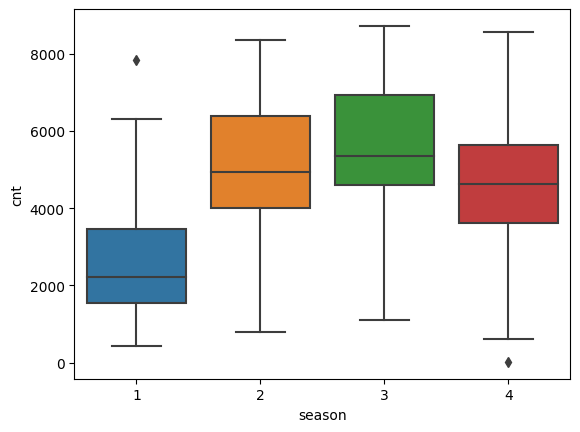

In [88]:
sns.boxplot(x = 'season', y = 'cnt', data = bk)
plt.show()

For season, we see that the trend goes up around the middle values and seems to drop around the edges. Value 3 is clearly the winner in terms of median and range, and value 1 seems to be the lowest. We can assume that there's some probability that season is a good predictor.

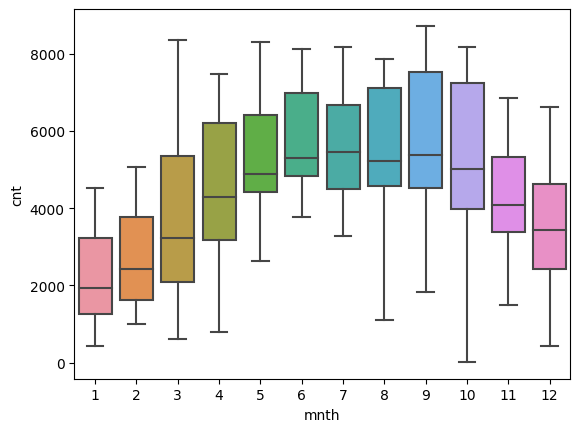

In [89]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bk)
plt.show()

With mnth, we see a very clear trend. The bookings definitely rise from month 3 to 6, then seem to stabilize, then drop from month 11 onwards. We can be pretty sure that mnth is a good predictor.

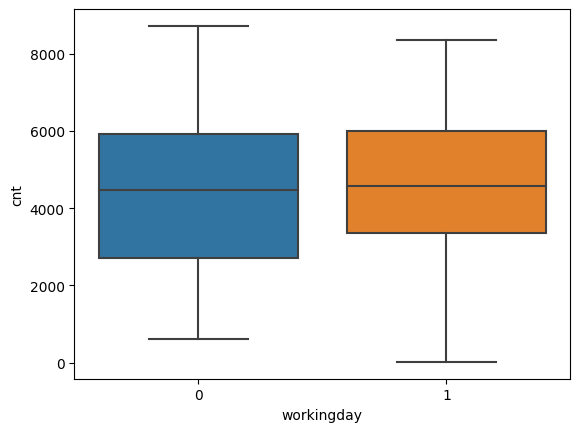

In [90]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bk)
plt.show()

For workingday, the bias seems to be towards value 1, and the medians are pretty close. Therefore we assume there is some probability that workingday could be a good predictor.

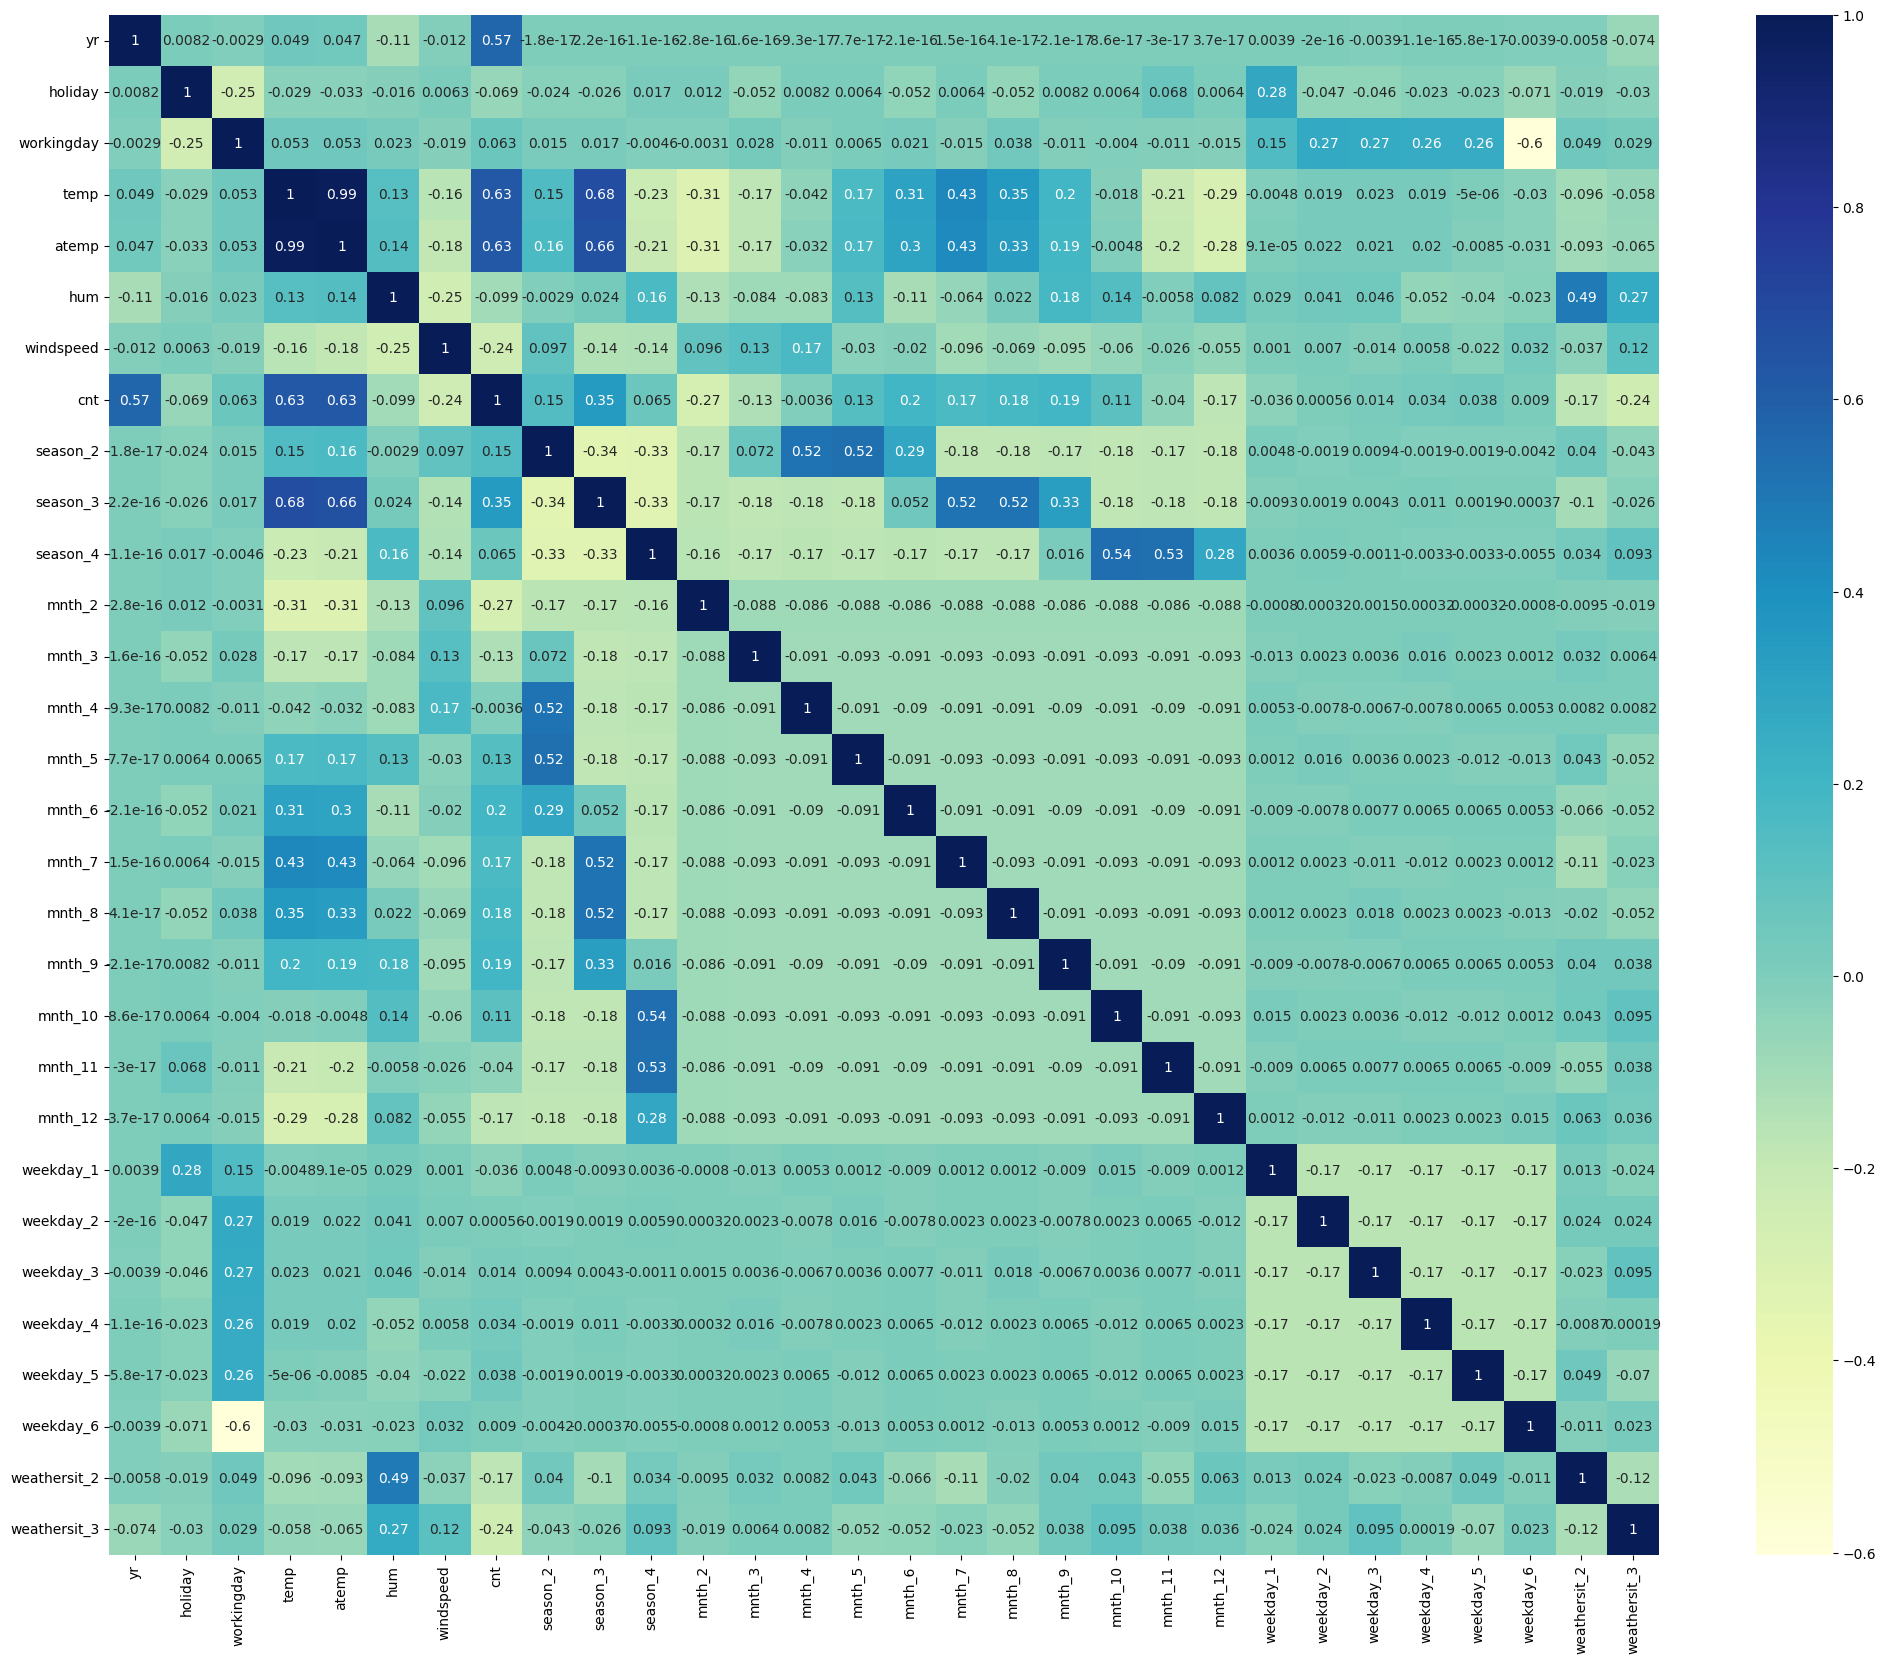

In [91]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bk3) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bk3.corr(), annot = True, cmap="YlGnBu")
plt.show()

The heatmap show that all variables have some degree of collinearity. The darker the cell the higher the collinearity, and vice versa.

Now we will rescale the numeric variables and verify the new columns in the training dataset

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(bk_train.head())
print(bk_train.columns)

     yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
483   1        0           0  18.791653  22.50605  58.7083   7.832836  6304   
650   1        0           0  16.126653  19.56980  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.16460  55.0833  10.500039  4266   
714   1        0           0  14.862500  18.49690  83.8750   6.749714  3786   
8     0        0           0   5.671653   5.80875  43.4167  24.250650   822   

     season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  \
483         1         0  ...        0        0          0          0   
650         0         0  ...        0        0          0          0   
212         0         1  ...        0        0          1          0   
714         0         0  ...        0        1          0          0   
8           0         0  ...        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
483          0

In [93]:
# Now we will apply a scaler to the numeric values

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bk_train[num_vars] = scaler.fit_transform(bk_train[num_vars])
bk_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


Now comes the main part of actually building a Model

In [94]:
#First we remove column cnt from the Ytrain and retain all columns in xtrain
y_train = bk_train.pop('cnt')
X_train = bk_train

Now we will use the Recursive Feature Elimination function to remove factors that have high collinearity with all the other variables. We can do this manually by checking the collinearity of each factor with all the other factors and removing the factors with the maximum collinearity one by one, but that will be time consuming. Plus, the RFE functionality is well proven. We will ask RFE to retain the 15 most non-collinear factors

In [95]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', False, 2),
 ('windspeed', False, 2),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', False, 2),
 ('mnth_4', False, 2),
 ('mnth_5', False, 2),
 ('mnth_6', False, 2),
 ('mnth_7', True, 1),
 ('mnth_8', False, 2),
 ('mnth_9', False, 2),
 ('mnth_10', False, 2),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 2),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [96]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'season_2', 'season_3',
       'season_4', 'mnth_7', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [97]:
# Now we will create the new xtest dataset with the factors we selected through RFE
X_train_rfe = X_train[col]

In [98]:
# Now we will check the Variability Inflation factor (VIF) for all the remaining variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
8,weekday_1,inf
9,weekday_2,inf
10,weekday_3,inf
11,weekday_4,inf
12,weekday_5,inf
3,temp,13.42
5,season_3,5.98
4,season_2,3.43


We see from the above VIF listing that many features have Infinite VIF, which are definite candidates for removal. Also we have temp and atemp showing whigh VIF. We will however still retain temp as it is sound business knowledge that temperature definitely impacts the sales in this case. These judgements have to be made using business knowhow.

In [99]:
# Before we proceed as per the drill we add a constant and create a fitted model. Then we check the
# parameters we get.
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.params

const           0.034484
yr              0.233143
holiday        -0.022809
workingday      0.012409
temp            0.507128
season_2        0.108284
season_3        0.101187
season_4        0.166785
mnth_7         -0.041706
weekday_1      -0.024897
weekday_2      -0.009591
weekday_3       0.006227
weekday_4       0.007472
weekday_5       0.010389
weathersit_3   -0.293957
dtype: float64

Now look at the summary for the current model. Mainly observe the P-values (P>|t| column). We should be recursively removing factors with the highest P-values

In [100]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          4.40e-157
Time:                        01:55:43   Log-Likelihood:                 433.49
No. Observations:                 510   AIC:                            -839.0
Df Residuals:                     496   BIC:                            -779.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0345      0.016      2.128   

Model 2
Remove factor weekday_3 due to its high p-value

In [101]:
X_train_new = X_train_rfe.drop(["weekday_3"], axis = 1)

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,13.42
2,workingday,6.46
5,season_3,5.98
4,season_2,3.43
6,season_4,2.36
8,weekday_1,2.02
11,weekday_5,2.01
9,weekday_2,1.96
0,yr,1.95
10,weekday_4,1.86


In [103]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [104]:
# Check the parameters obtained

lr2.params

const           0.034484
yr              0.233143
holiday        -0.016582
workingday      0.018637
temp            0.507128
season_2        0.108284
season_3        0.101187
season_4        0.166785
mnth_7         -0.041706
weekday_1      -0.031124
weekday_2      -0.015818
weekday_4       0.001245
weekday_5       0.004162
weathersit_3   -0.293957
dtype: float64

In [105]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          4.40e-157
Time:                        01:55:43   Log-Likelihood:                 433.49
No. Observations:                 510   AIC:                            -839.0
Df Residuals:                     496   BIC:                            -779.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0345      0.016      2.128   

Model 3
Remove the factor weekday_4 due to its high p-value

In [106]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

In [107]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,13.42
5,season_3,5.98
2,workingday,4.37
4,season_2,3.43
6,season_4,2.36
0,yr,1.95
8,weekday_1,1.59
10,weekday_5,1.56
9,weekday_2,1.52
7,mnth_7,1.47


In [108]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [109]:
lr3.params

const           0.034474
yr              0.233152
holiday        -0.015998
workingday      0.019212
temp            0.507143
season_2        0.108296
season_3        0.101178
season_4        0.166782
mnth_7         -0.041724
weekday_1      -0.031701
weekday_2      -0.016395
weekday_5       0.003584
weathersit_3   -0.294023
dtype: float64

In [110]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          3.49e-158
Time:                        01:55:44   Log-Likelihood:                 433.48
No. Observations:                 510   AIC:                            -841.0
Df Residuals:                     497   BIC:                            -785.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0345      0.016      2.130   

Model 4

Remove the factor weekday_5 due to its high p-value

In [111]:
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)

In [112]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,13.36
5,season_3,5.97
2,workingday,3.45
4,season_2,3.42
6,season_4,2.34
0,yr,1.95
7,mnth_7,1.47
8,weekday_1,1.41
9,weekday_2,1.34
1,holiday,1.21


In [113]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [114]:
# Check the parameters obtained

lr4.params

const           0.034552
yr              0.233221
holiday        -0.014837
workingday      0.020463
temp            0.506571
season_2        0.108519
season_3        0.101383
season_4        0.167079
mnth_7         -0.041430
weekday_1      -0.032941
weekday_2      -0.017626
weathersit_3   -0.294845
dtype: float64

In [115]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     167.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          2.71e-159
Time:                        01:55:44   Log-Likelihood:                 433.46
No. Observations:                 510   AIC:                            -842.9
Df Residuals:                     498   BIC:                            -792.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0346      0.016      2.137   

Model 5
Remove the factor holiday due to its high p-value

In [116]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,13.15
4,season_3,5.93
3,season_2,3.41
1,workingday,3.19
5,season_4,2.34
0,yr,1.94
6,mnth_7,1.46
8,weekday_2,1.34
7,weekday_1,1.26
9,weathersit_3,1.04


In [118]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [119]:
# Check the parameters obtained

lr5.params

const           0.033831
yr              0.233061
workingday      0.021909
temp            0.506022
season_2        0.108743
season_3        0.101920
season_4        0.166953
mnth_7         -0.041902
weekday_1      -0.035099
weekday_2      -0.018100
weathersit_3   -0.294803
dtype: float64

In [120]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          2.14e-160
Time:                        01:55:44   Log-Likelihood:                 433.36
No. Observations:                 510   AIC:                            -844.7
Df Residuals:                     499   BIC:                            -798.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0338      0.016      2.105   

Model 6
Remove the factor weekday_2 due to its high p-value

In [121]:
#remove weekday_4 due to high p-value
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

In [122]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,13.13
4,season_3,5.91
3,season_2,3.40
1,workingday,2.82
5,season_4,2.33
0,yr,1.94
6,mnth_7,1.46
7,weekday_1,1.20
8,weathersit_3,1.03


In [123]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [124]:
# Check the parameters obtained

lr6.params

const           0.033530
yr              0.232625
workingday      0.017660
temp            0.504991
season_2        0.109962
season_3        0.103089
season_4        0.168054
mnth_7         -0.042448
weekday_1      -0.031151
weathersit_3   -0.293216
dtype: float64

In [125]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          3.25e-161
Time:                        01:55:44   Log-Likelihood:                 432.53
No. Observations:                 510   AIC:                            -845.1
Df Residuals:                     500   BIC:                            -802.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0335      0.016      2.085   

Model 7
Remove the factor workingday due to its high p-value

In [126]:
#remove weekday_3 due to high p-value
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [127]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,10.89
3,season_3,5.80
2,season_2,3.38
4,season_4,2.33
0,yr,1.92
5,mnth_7,1.44
6,weekday_1,1.15
7,weathersit_3,1.03


In [128]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [129]:
# Check the parameters obtained

lr6.params

const           0.043855
yr              0.232584
temp            0.508681
season_2        0.109099
season_3        0.102287
season_4        0.167168
mnth_7         -0.045187
weekday_1      -0.027196
weathersit_3   -0.291146
dtype: float64

In [130]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     228.4
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          9.38e-162
Time:                        01:55:45   Log-Likelihood:                 430.99
No. Observations:                 510   AIC:                            -844.0
Df Residuals:                     501   BIC:                            -805.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0439      0.015      2.928   

Model 8
Remove the factor weekday_1 due to its high p-value

In [131]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,10.72
3,season_3,5.79
2,season_2,3.38
4,season_4,2.33
0,yr,1.92
5,mnth_7,1.44
6,weathersit_3,1.03


In [133]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [134]:
lr6.params

const           0.040606
yr              0.232161
temp            0.507941
season_2        0.109496
season_3        0.102530
season_4        0.166710
mnth_7         -0.045441
weathersit_3   -0.289443
dtype: float64

In [135]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     258.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          4.30e-162
Time:                        01:55:45   Log-Likelihood:                 428.91
No. Observations:                 510   AIC:                            -841.8
Df Residuals:                     502   BIC:                            -808.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0406      0.015      2.719   

Model 9
Remove the factor mnth_7 due to its high p-value

In [136]:
X_train_new = X_train_new.drop(["mnth_7"], axis = 1)

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,10.59
3,season_3,5.61
2,season_2,3.35
4,season_4,2.32
0,yr,1.92
5,weathersit_3,1.03


In [138]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [139]:
# Check the parameters obtained

lr6.params

const           0.044579
yr              0.232282
temp            0.494373
season_2        0.113582
season_3        0.095857
season_4        0.168822
weathersit_3   -0.290419
dtype: float64

In [140]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     298.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          3.00e-162
Time:                        01:55:45   Log-Likelihood:                 426.33
No. Observations:                 510   AIC:                            -838.7
Df Residuals:                     503   BIC:                            -809.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0446      0.015      2.993   

Now we have a very good set of features by seeing that the p-values for all of them except for the constant are 0s.

Now we verify that the residuals are normally distributed


In [141]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Residuals')

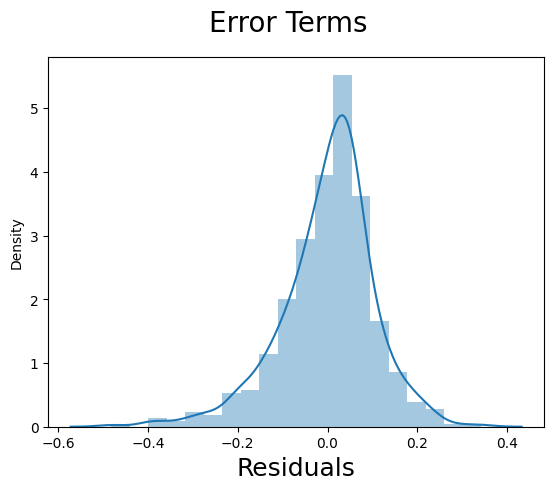

In [142]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)                         # X-label

We can see from the above charts that the errors are normally distributed

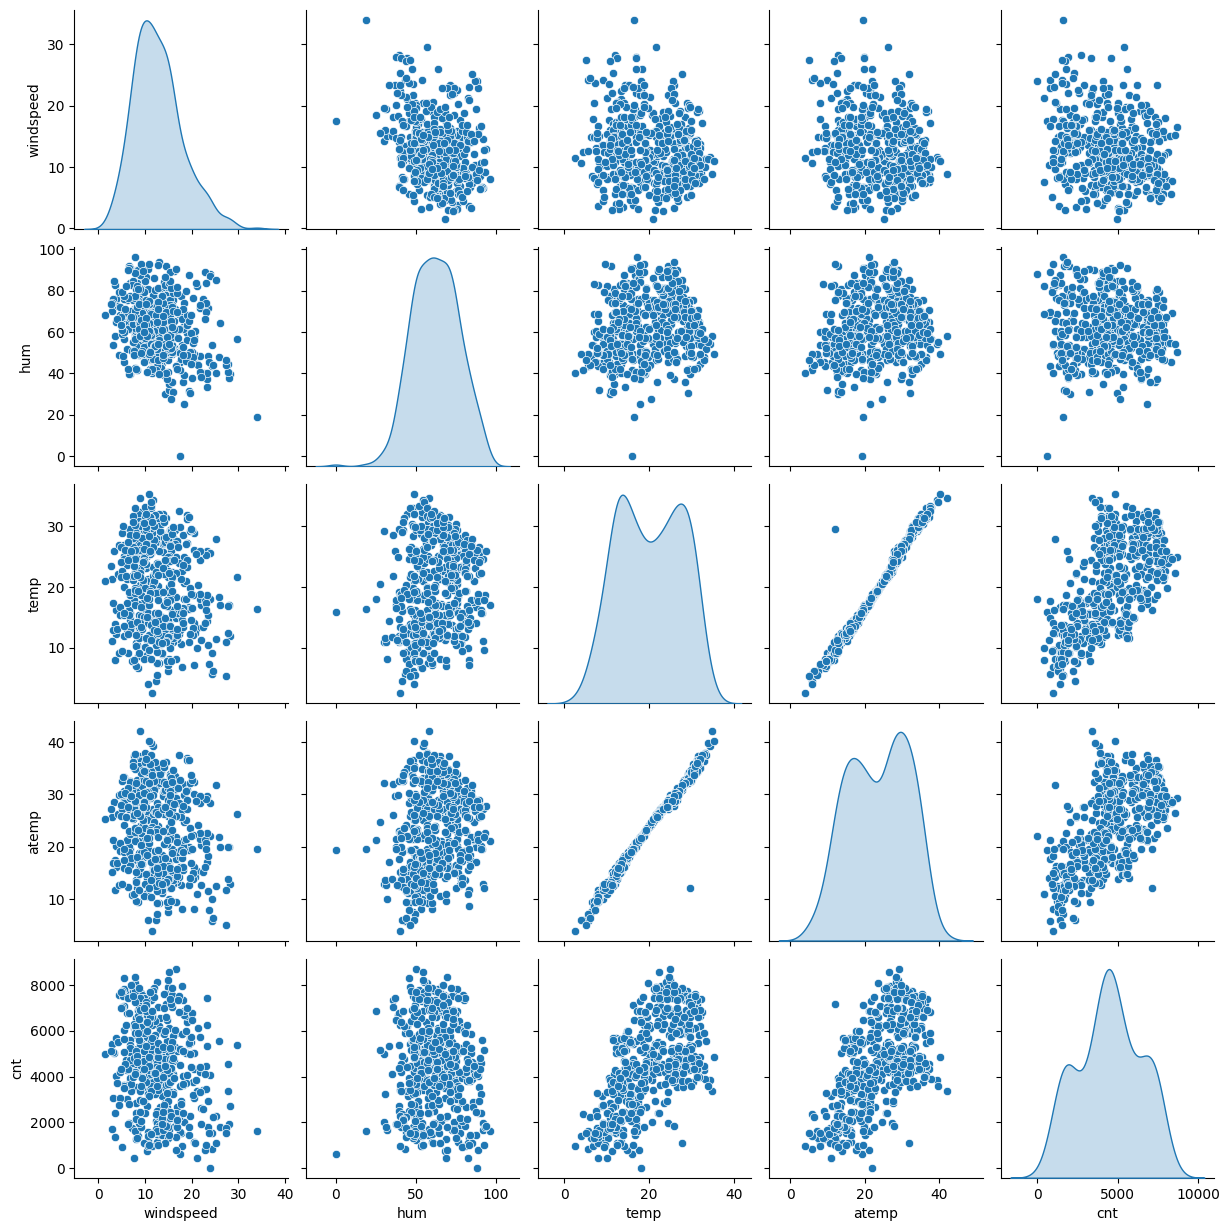

In [143]:
# We will also check for the collinearity between the numeric variables
bk3=bk3[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bk_num, diag_kind='kde')
plt.show()

In [144]:
# Now we will check the VIF values to ensure there is no multicollinearity between the independent variables of our choosing
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,10.59
3,season_3,5.61
2,season_2,3.35
4,season_4,2.32
0,yr,1.92
5,weathersit_3,1.03


In [145]:
# Now we will rescale the numeric features. We will not fit the model, only transform.
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bk_test[num_vars] = scaler.transform(bk_test[num_vars])
bk_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [147]:
# Now we divide the test dataset into x and y
y_test = bk_test.pop('cnt')
X_test = bk_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [148]:
# Now we choose only those variables that were part of our best model
col1=X_train_new.columns
X_test=X_test[col1]
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   season_2      219 non-null    uint8  
 4   season_3      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   weathersit_3  219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 7.7 KB


In [149]:
# Now we make the predictions using our best model

y_pred = lr6.predict(X_test_lm6)

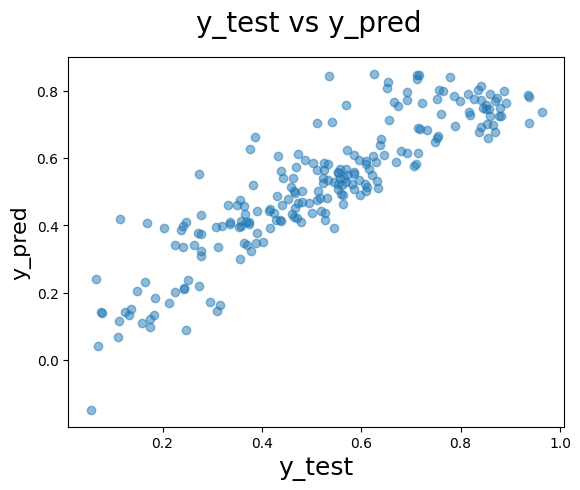

In [150]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

We can see a definite collinearity between the test and predicted values here

Now we will work on getting the r-squared and adjusted r-squared values

In [151]:
#getting the r squared value
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7895483976488348

In [152]:
# Get the shape of X_test
X_test.shape

(219, 6)

In [153]:
# the below calculation will give us the adjusted r-squared value
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7835922202238018

78% is a very good adjusted r-squared value. It means that 78% of the variability in the dependent variable is explained by the chosen independent variables. Hence we conclude that the independent variables we chose are good to go with.

Conclusion:

The following variables can be considered good predictors:

Variable        Coefficient
 
========        ===========
 
temp             0.4944 
 
weathersit_3    -0.2904 
 
yr               0.2323 
 
season_4         0.1688  